In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from visualize import *
from util import *


from color_correction import *
from tone_adjustment import *

from color_transfer import *
from color_transfer_reinhart import *

import matplotlib.pyplot as plt

from histogram_matching import *
from lut_generation import *


In [3]:
# load images
img_ref_bgr = cv2.imread("img/drive-ref.jpg")
img_src_bgr = cv2.imread("img/drive-src.jpg")

img_src_sam2 = cv2.imread("img/drive-mask-src.png")
img_ref_sam2 = cv2.imread("img/drive-mask-ref.png")

In [4]:
# convert to RGB
img_ref_rgb = cv2.cvtColor(img_ref_bgr, cv2.COLOR_BGR2RGB)
img_src_rgb = cv2.cvtColor(img_src_bgr, cv2.COLOR_BGR2RGB)

L_in range: 0 - 255
L_ref range: 0 - 255
L_in mean: 94.66
L_ref mean: 47.47
transfer_function_in range: 0.0013271350180730224 - 1.0
transfer_function_ref range: 0.1822972297668457 - 0.9999998807907104
transfer_function_in_inv range: 0.0 - 255.0
full_transfer_function range: 0 - 233
L_matched range: 0 - 233
L_matched mean: 46.91


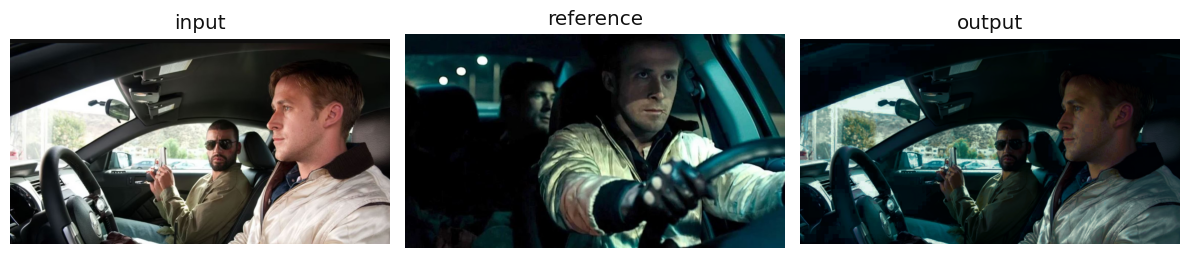

In [6]:
# out_img = adobe_color_transfer(img_src_rgb, img_ref_rgb, smooth_luminance_transfer=0.01, overlap_split_tone=0.1, color_space="LAB", draw_transfer=True)
out_img = color_transfer(img_src_rgb, img_ref_rgb, method="Blend")
plot_before_after(img_ref_rgb, img_src_rgb, out_img)


In [7]:
# generate LUT

generate_lut_smooth(img_src_rgb, out_img, path="lut/drive_lut.cube")

/Users/jgoueslard/Home/dev/msct/IA_CV/pickment/visualize.py:202: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(theta, r, c=img_rgb,


<PolarAxes: >

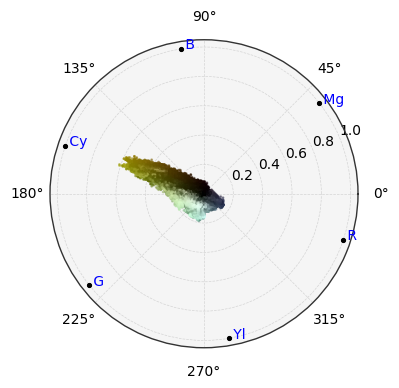

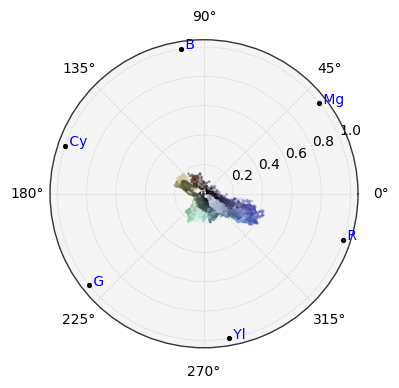

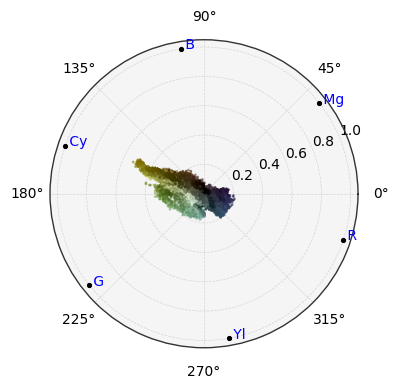

In [8]:
# plot vectorscope
# ref
plot_vectorscope(img_ref_rgb)

# src
plot_vectorscope(img_src_rgb)

# output
plot_vectorscope(out_img)

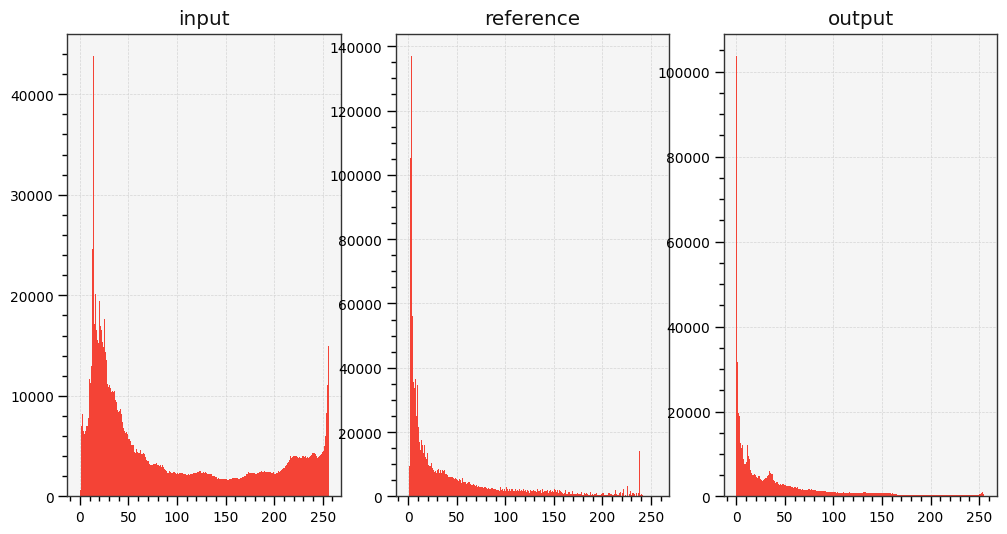

In [9]:
show_histograms(out_img, img_src_rgb, img_ref_rgb)

/Users/jgoueslard/Home/dev/msct/IA_CV/pickment/visualize.py:122: RuntimeWarning: overflow encountered in scalar subtract
  b_color_scope[-(vals[i]-255)][l] = cnts[i]
/Users/jgoueslard/Home/dev/msct/IA_CV/pickment/visualize.py:122: RuntimeWarning: overflow encountered in scalar negative
  b_color_scope[-(vals[i]-255)][l] = cnts[i]
/Users/jgoueslard/Home/dev/msct/IA_CV/pickment/visualize.py:124: RuntimeWarning: overflow encountered in scalar subtract
  b_color_scope[-(vals[i]-255)][l] = 255
/Users/jgoueslard/Home/dev/msct/IA_CV/pickment/visualize.py:124: RuntimeWarning: overflow encountered in scalar negative
  b_color_scope[-(vals[i]-255)][l] = 255
/Users/jgoueslard/Home/dev/msct/IA_CV/pickment/visualize.py:130: RuntimeWarning: overflow encountered in scalar subtract
  g_color_scope[-(vals[i]-255)][l] = cnts[i]
/Users/jgoueslard/Home/dev/msct/IA_CV/pickment/visualize.py:130: RuntimeWarning: overflow encountered in scalar negative
  g_color_scope[-(vals[i]-255)][l] = cnts[i]
/Users/jgoue

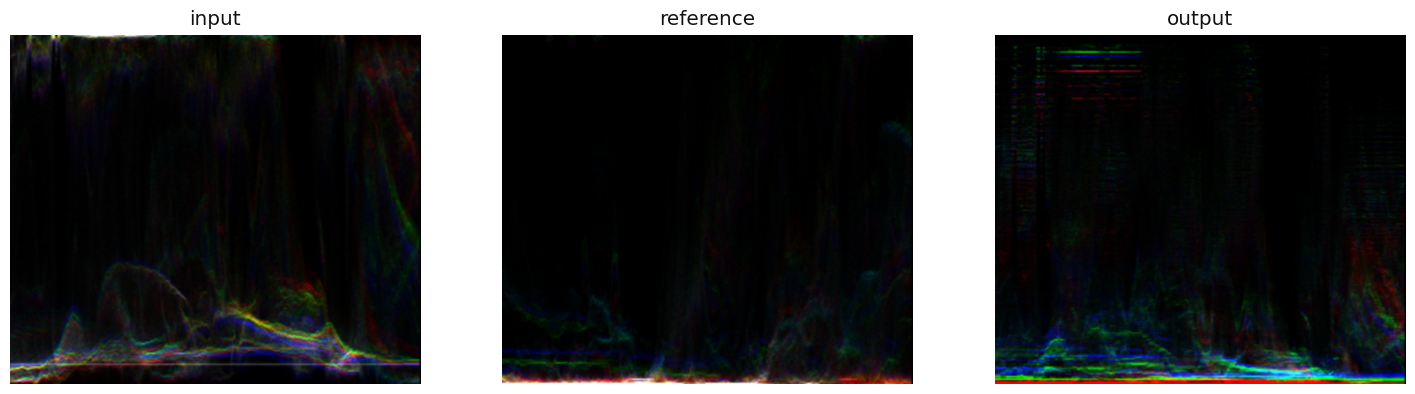

In [10]:
show_parades(img_ref_rgb, img_src_rgb, out_img)

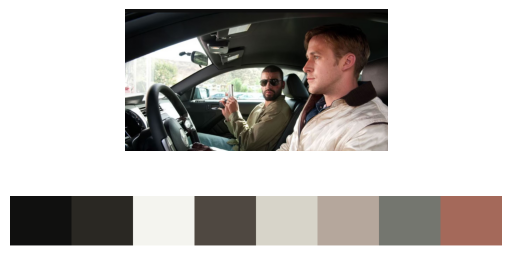

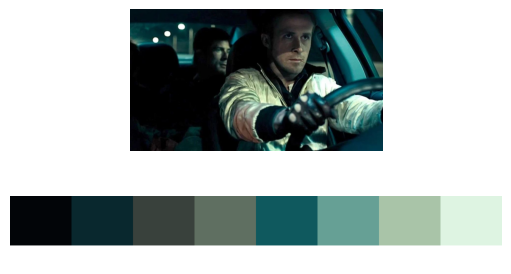

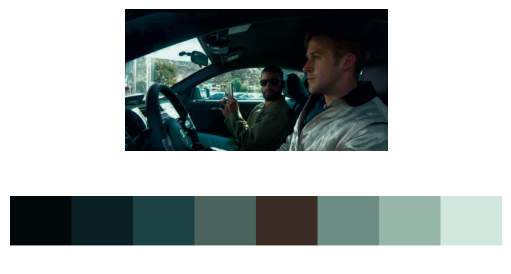

In [18]:
plot_color_palette(img_src_rgb)
plot_color_palette(img_ref_rgb)
plot_color_palette(out_img)

In [19]:
skin_mask_src = generate_skin_mask(img_src_rgb)
skin_mask_ref = generate_skin_mask(img_ref_rgb)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


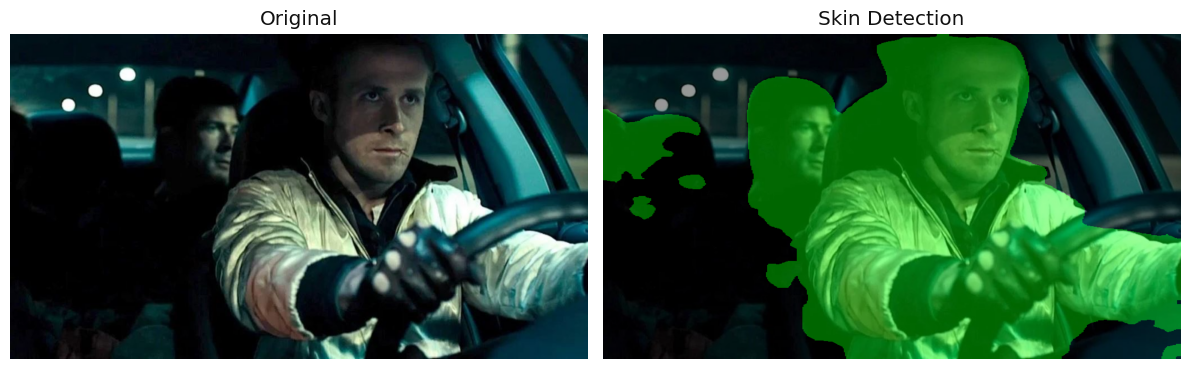

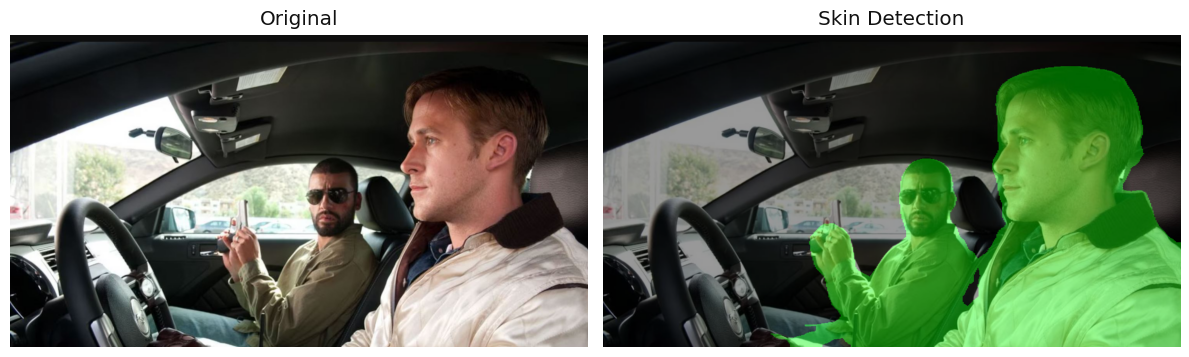

In [20]:
display_mask_comparison(img_ref_rgb, skin_mask_ref)
display_mask_comparison(img_src_rgb, skin_mask_src)

In [21]:
skin_detection_src = skin_detection(img_src_rgb)
skin_detection_ref = skin_detection(img_ref_rgb)

combined_mask_src = np.where((skin_mask_src == 255) & (skin_detection_src == 255), 255, 0).astype(np.uint8)
combined_mask_ref = np.where((skin_mask_ref == 255) & (skin_detection_ref == 255), 255, 0).astype(np.uint8)


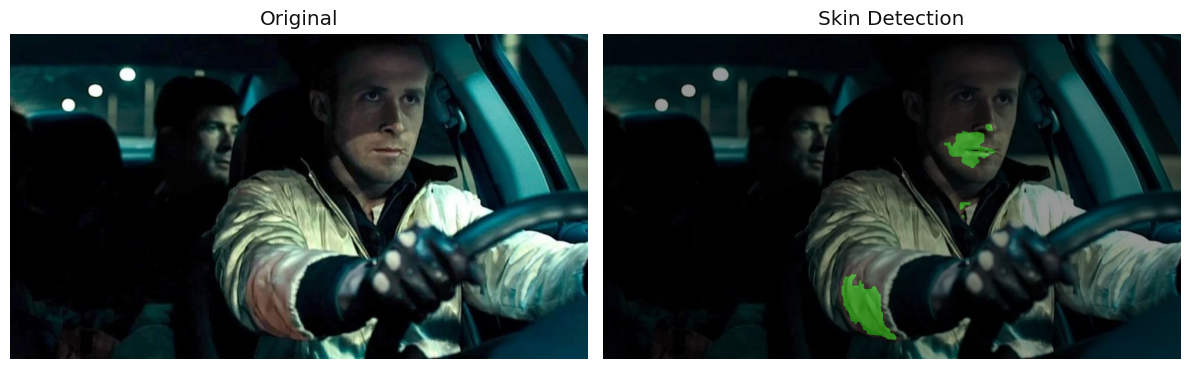

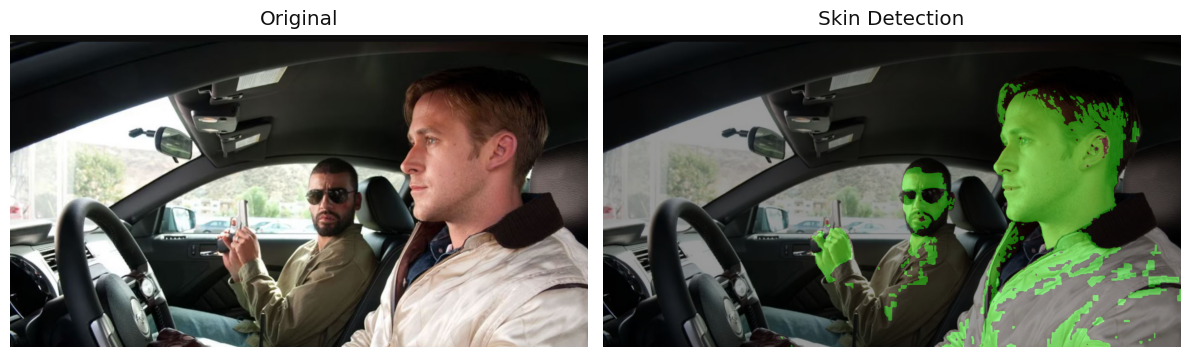

In [22]:
display_mask_comparison(img_ref_rgb, combined_mask_ref)
display_mask_comparison(img_src_rgb, combined_mask_src)

In [33]:
skin_mask = [skin_mask_src, skin_mask_ref]
out_img = color_transfer(img_src_rgb, img_ref_rgb, method="Adobe",  strength=1.0)
out_img_skin_corrected = color_transfer(img_src_rgb, img_ref_rgb, method="Adobe", skin_mask=skin_mask, strength=1.0)

L_in range: 0 - 255
L_ref range: 0 - 255
L_in mean: 94.66
L_ref mean: 47.47
transfer_function_in range: 0.0013271350180730224 - 1.0
transfer_function_ref range: 0.1822972297668457 - 0.9999998807907104
transfer_function_in_inv range: 0.0 - 255.0
full_transfer_function range: 0 - 233
L_matched range: 0 - 233
L_matched mean: 46.91
L_in range: 0 - 255
L_ref range: 0 - 255
L_in mean: 94.66
L_ref mean: 47.47
transfer_function_in range: 0.0013271350180730224 - 1.0
transfer_function_ref range: 0.1822972297668457 - 0.9999998807907104
transfer_function_in_inv range: 0.0 - 255.0
full_transfer_function range: 0 - 233
L_matched range: 0 - 233
L_matched mean: 46.91


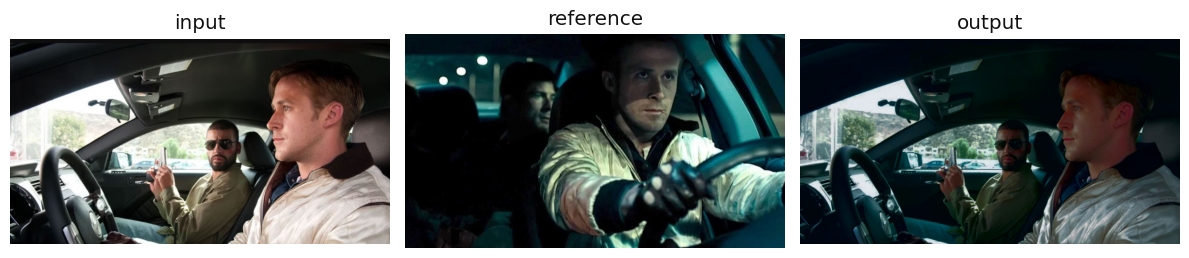

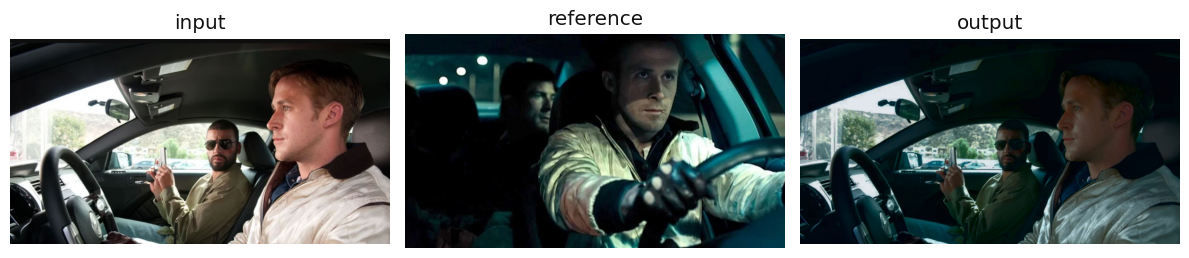

In [34]:
plot_before_after(img_ref_rgb, img_src_rgb, out_img)

plot_before_after(img_ref_rgb, img_src_rgb, out_img_skin_corrected)

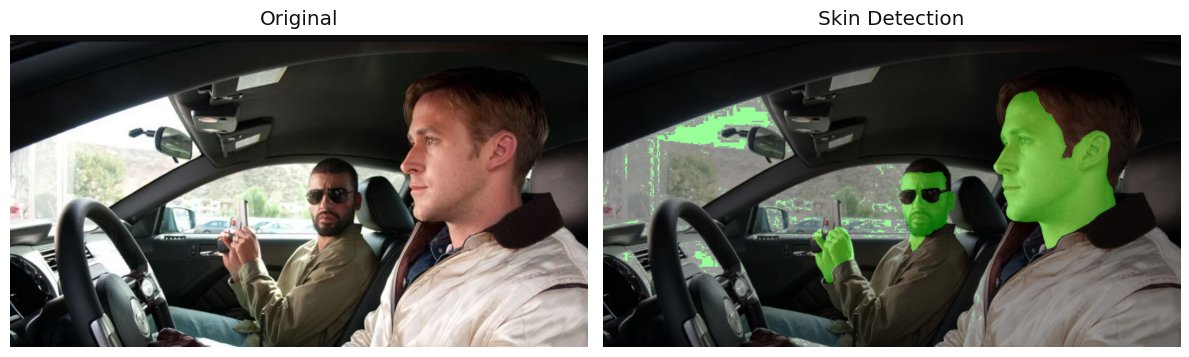

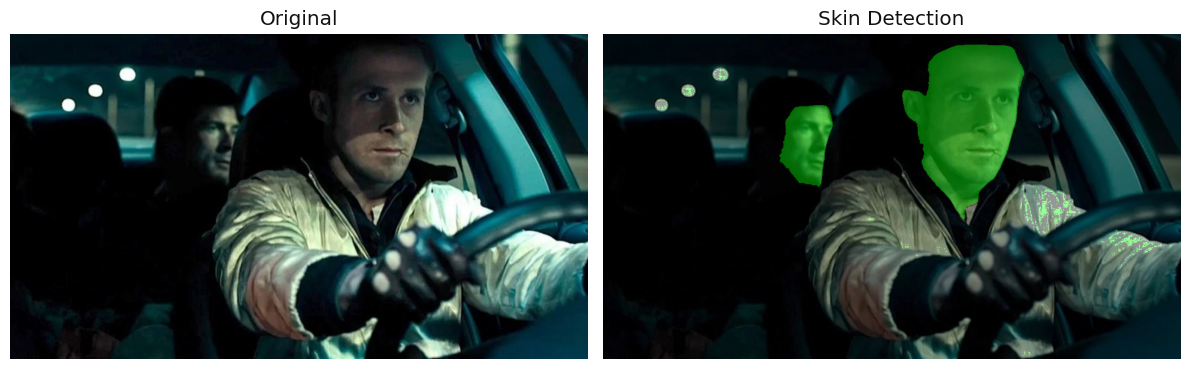

L_in range: 0 - 255
L_ref range: 0 - 255
L_in mean: 94.66
L_ref mean: 47.47
transfer_function_in range: 0.0013271350180730224 - 1.0
transfer_function_ref range: 0.1822972297668457 - 0.9999998807907104
transfer_function_in_inv range: 0.0 - 255.0
full_transfer_function range: 0 - 233
L_matched range: 0 - 233
L_matched mean: 46.91


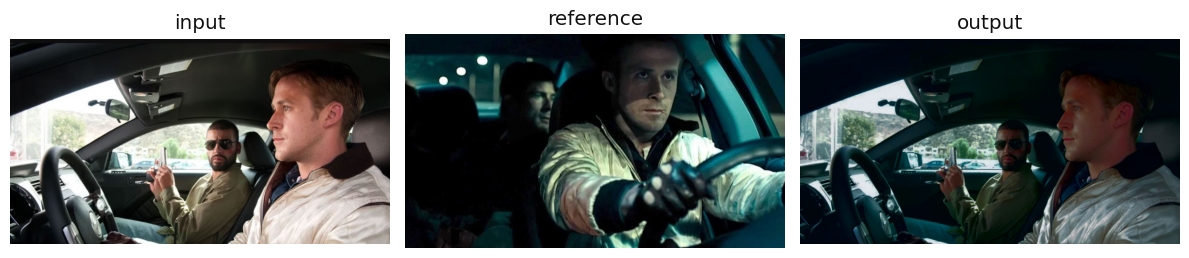

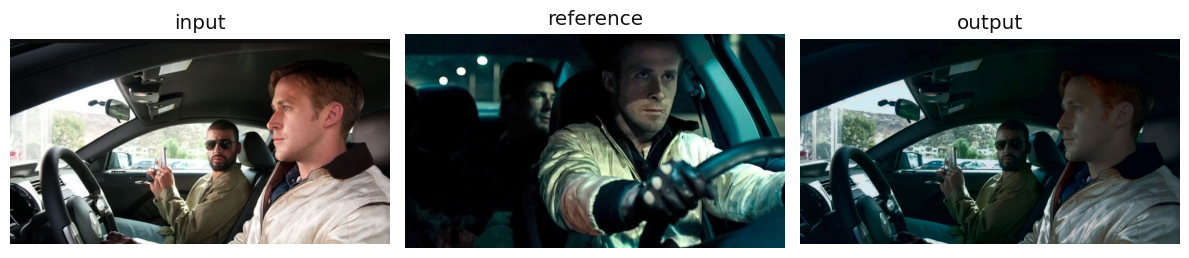

In [35]:
############### SAM2 EXPERIMENTATIONS ###############
# load masks generated from SAMv2

skin_mask_src_sam2 = load_sam2_mask(img_src_sam2)
skin_mask_ref_sam2 = load_sam2_mask(img_ref_sam2)

# resize input image to match SAM2 inference output !
src_sam2_h, src_sam2_w = skin_mask_src_sam2.shape[:2]
img_src_rgb_for_sam2 = cv2.resize(img_src_rgb, (src_sam2_w, src_sam2_h), interpolation=cv2.INTER_LINEAR)

ref_sam2_h, ref_sam2_w = skin_mask_ref_sam2.shape[:2]
img_ref_rgb_for_sam2 = cv2.resize(img_ref_rgb, (ref_sam2_w, ref_sam2_h), interpolation=cv2.INTER_LINEAR)

display_mask_comparison(img_src_rgb_for_sam2, skin_mask_src_sam2)
display_mask_comparison(img_ref_rgb_for_sam2, skin_mask_ref_sam2)

skin_mask_sam2 = [skin_mask_src_sam2, skin_mask_ref_sam2]
out_img_skin_corrected_sam2 = color_transfer(img_src_rgb_for_sam2, img_ref_rgb_for_sam2, method="Adobe", skin_mask=skin_mask_sam2, strength=1.0)

plot_before_after(img_ref_rgb, img_src_rgb, out_img)

plot_before_after(img_ref_rgb, img_src_rgb, out_img_skin_corrected_sam2)
